## << 문제 정의 >>

주어진 California Housing dataset을 사용하여 house block별로 **집값의 중앙값(MedHouseVal)**를 예측하는 문제를 풉니다.

사용할 데이터는 scikit-learn에서 제공하는 California Housing Data를 사용합니다. 데이터 설명은 아래 링크를 참고하세요.

평가하는 성능 지표는 예측한 MedHouseVal과 정답 MedHouseVal 사이의 **Root Mean Squared Error(RMSE)**값으로 정의합니다.



> [Source] https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import gc

from tqdm.auto import tqdm
# tqdm : 진행상황 표시 라이브러리
# 특정 함수만 가지고 오고 싶은데 from ~ import ~ 사용
import sklearn

### Q1. sklearn 라이브러리의 fetch_california_housing 함수를 사용하여 DataFrame 형태의 원본 데이터와, 데이터에 대한 설명을 출력하세요.

In [ ]:
# 함수 불러오기
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data = housing.frame
description = housing.DESCR

display(data)
print(description)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Q2. 불러온 데이터의 기본적인 정보를 확인합니다. data의 크기를 확인하고, MedHouseVal에 대한 histogram을 출력합니다.

(20640, 9)


<Axes: xlabel='MedHouseVal', ylabel='Count'>

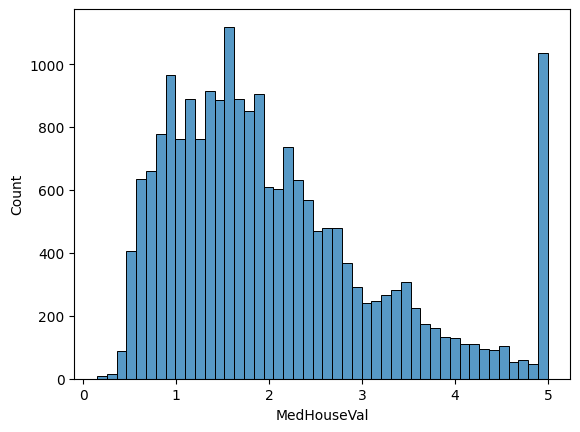

In [ ]:
# data 크기 출력
print(data.shape)
# histogram 출력
sns.histplot(data['MedHouseVal'])

### Q3. 학습을 위해서 데이터를 train, test 데이터로 분할합니다. 데이터 분할을 위한 feature_vector와 target value를 정의하고, train_test_split 함수를 사용하여 데이터를 분할하세요.

(단, train : test 데이터의 비율은 8 : 2로 합니다.)

In [ ]:
# 데이터 분할에 사용할 데이터 정의

X = data.drop('MedHouseVal', axis=1) # feature vector
y = data['MedHouseVal'] # target value

from sklearn.model_selection import train_test_split
# train_test_split 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


### Q4. Q3에서 만든 학습 데이터를 사용하여, LinearRegression 모델을 학습합니다.

In [ ]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

# 모델 선언하기
model = LinearRegression()

# 모델 학습하기
model.fit(X_train, y_train)


LinearRegression()

### Q5. Q4에서 학습한 모델의 예측값과 실제 정답을 비교하여 모델 성능을 평가합니다. 성능 평가는 학습 데이터와 테스트 데이터 둘다 평가합니다.

In [ ]:
# 검증에 사용될 함수 불러오기
from sklearn.metrics import mean_squared_error


train_preds = model.predict(X_train) # 모델의 학습 데이터 예측값
test_preds =  model.predict(X_test) # 모델의 테스트 데이터 예측값

train_rmse =  np.sqrt(mean_squared_error(y_train, train_preds)) # 학습 데이터로 평가한 RMSE
test_rmse  =  np.sqrt(mean_squared_error(y_test, test_preds))   # 테스트 데이터로 평가한 RMSE

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

Train RMSE : 0.7197
Test RMSE : 0.7456
